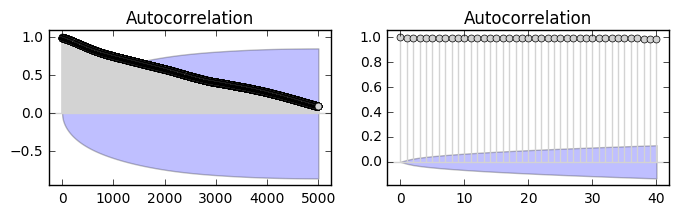

In [4]:
%matplotlib inline
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
n225 = pdr.DataReader("NIKKEI225",'fred',"1949/5/16").dropna()
lnn225=np.log(n225)
fig = plt.figure(figsize=(8,2))
ax1 = fig.add_subplot(1,2,1)
fig = sm.graphics.tsa.plot_acf(lnn225.squeeze(),lags=5000,color='lightgray',ax=ax1)
ax2 = fig.add_subplot(1,2,2)
fig = sm.graphics.tsa.plot_acf(lnn225.squeeze(),lags=40,color='lightgray',ax=ax2)

In [6]:
arma_mod = sm.tsa.ARMA(lnn225,order=(1,0))
arma_res = arma_mod.fit(trend='c',disp=-1)
print(arma_res.summary())

                              ARMA Model Results                              
Dep. Variable:              NIKKEI225   No. Observations:                16933
Model:                     ARMA(1, 0)   Log Likelihood               50354.432
Method:                       css-mle   S.D. of innovations              0.012
Date:                Sat, 03 Jun 2017   AIC                        -100702.863
Time:                        19:48:43   BIC                        -100679.652
Sample:                    05-16-1949   HQIC                       -100695.208
                         - 06-02-2017                                         
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               7.6431      2.125      3.596      0.000         3.477    11.809
ar.L1.NIKKEI225     1.0000   2.02e-05   4.94e+04      0.000         1.000     1.000
                                

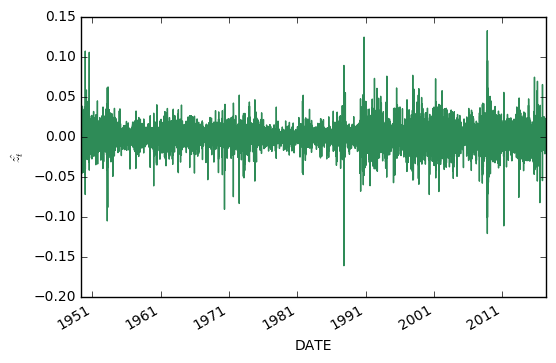

In [8]:
arma_res.resid.ix[1:].plot(figsize=(6,4),color='seagreen')
plt.ylabel('$\hat{z_t}$')

In [10]:
from statsmodels.tsa import stattools
acf,q,pvalue = stattools.acf(arma_res.resid,nlags=5,qstat=True)
pacf,confint = stattools.pacf(arma_res.resid,nlags=5,alpha=0.05)
print("自己相関係数: ",acf)
print("p値: ",pvalue)
print("偏自己相関: ",pacf)
print("95%信頼区間: ",confint)

自己相関係数:  [ 1.          0.00860138 -0.00137359  0.00505706  0.00555952 -0.00567606]
p値:  [ 0.26298252  0.52599055  0.63291435  0.69140843  0.73271644]
偏自己相関:  [ 1.          0.00860189 -0.00144785  0.00508263  0.00547201 -0.00575894]
95%信頼区間:  [[ 1.          1.        ]
 [-0.00646006  0.02366383]
 [-0.0165098   0.0136141 ]
 [-0.00997932  0.02014457]
 [-0.00958994  0.02053396]
 [-0.02082089  0.00930301]]


In [11]:
p=sm.tsa.adfuller(arma_res.resid,regression='nc')[1]
p1=sm.tsa.adfuller(arma_res.resid,regression='nc')[1]
print("ドリフト無しランダムウォーク p値: ",p)
print("ドリフト付きランダムウォーク p値: ",p1)

ドリフト無しランダムウォーク p値:  0.0
ドリフト付きランダムウォーク p値:  0.0


In [14]:
from scipy.stats import t
resid=arma_res.resid.ix[1:]
m=resid.mean()
v=resid.std()
resid_max=pd.Series.rolling(arma_res.resid,window=250).mean().max()
resid_min=pd.Series.rolling(arma_res.resid,window=250).mean().min()
print("平均: %2.5f"%m,"標準偏差: %2.4f"%v)
print("250日平均の最大値: %2.5f"%resid_max,"250日平均の最小値: %2.5f"%resid_min)
print("250日平均の95％の信頼区間:",(t.interval(alpha=0.95,df=250,loc=0,scale=v)))

平均: 0.00029 標準偏差: 0.0124
250日平均の最大値: 0.00363 250日平均の最小値: -0.01231
250日平均の95％の信頼区間: (-0.024344042799759553, 0.024344042799759553)


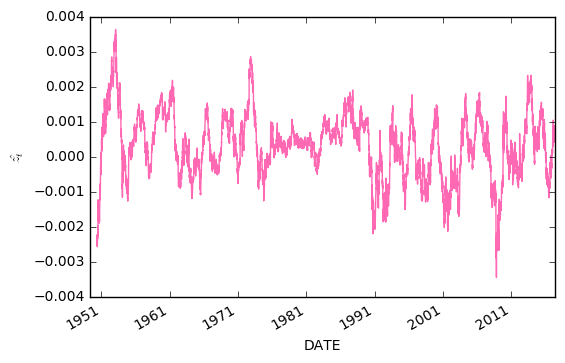

In [15]:
pd.Series.rolling(arma_res.resid.ix[1:],250).mean().plot(figsize=(6,4),color='hotpink')
plt.ylabel('$\hat{z_t}$')

In [16]:
from scipy.stats import chi2
resid=arma_res.resid.ix[1:]
m=resid.mean()
v=resid.std()
resid_max=pd.Series.rolling(arma_res.resid,window=250).std().max()
resid_min=pd.Series.rolling(arma_res.resid,window=250).std().min()
print("平均: %2.5f"%m,"標準偏差: %2.5f"%v)
print("250日標準偏差の最大値:%2.5f"%resid_max,"250日標準偏差の最小値:%2.5f"%resid_min)

cint1,cint2=chi2.interval(alpha=(0.95),df=249)

print("250日標準偏差の信頼区間:%2.4f"%(np.sqrt(cint1/249)*v),)
print("<= \sigma <=%2.4f"%(np.sqrt(cint2/249)*v))

平均: 0.00029 標準偏差: 0.01236
250日標準偏差の最大値:0.15736 250日標準偏差の最小値:0.00417
250日標準偏差の信頼区間:0.0113
<= \sigma <=0.0134


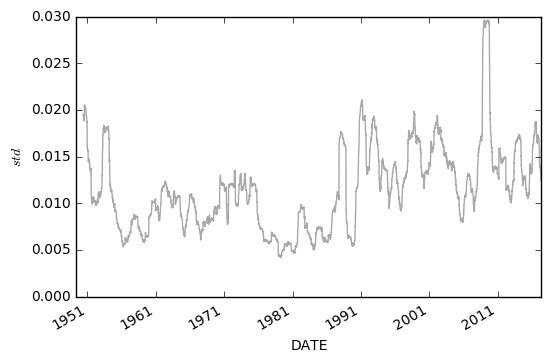

In [17]:
pd.Series.rolling(arma_res.resid.ix[1:],250).std().plot(figsize=(6,4),color='darkgray')
plt.ylabel('$std$')

IndexError: list index out of range

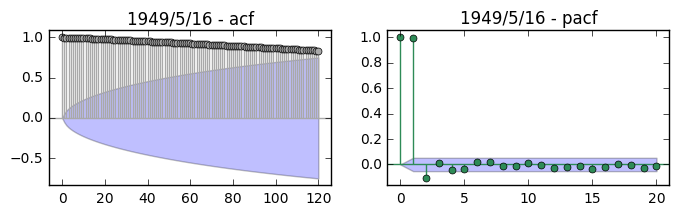

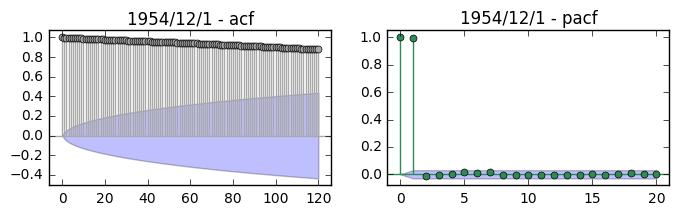

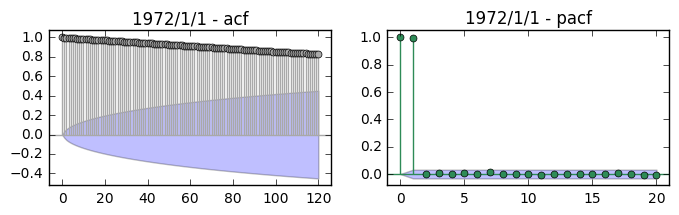

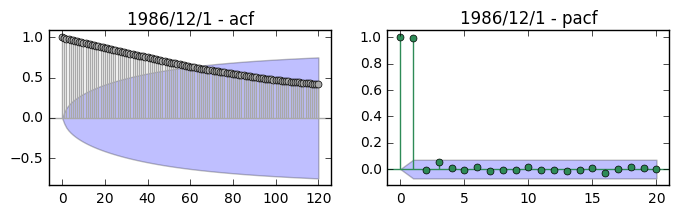

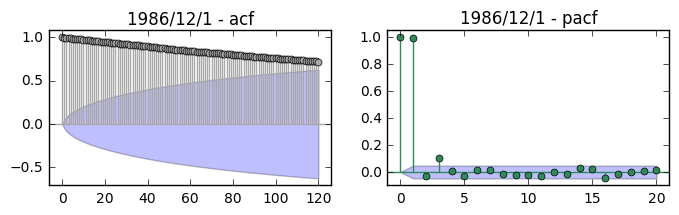

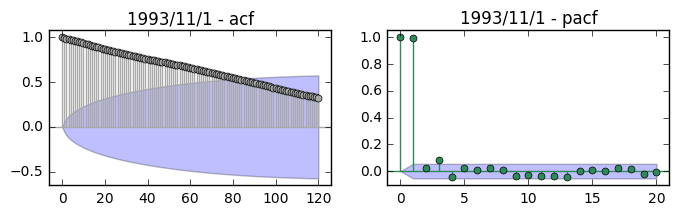

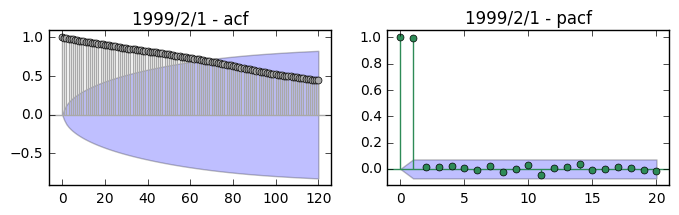

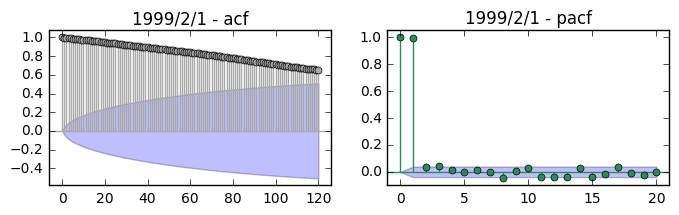

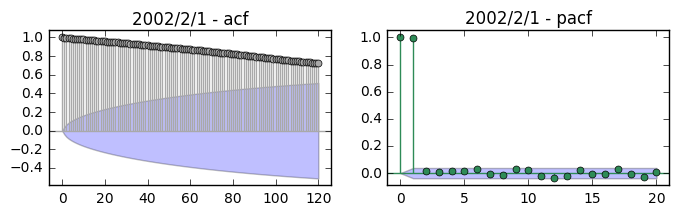

In [21]:
bcs=["1949/5/16","1954/12/1","1972/1/1","1986/12/1","1986/12/1","1993/11/1","1999/2/1","1999/2/1","2002/2/1","2009/4/1"]
bce=["1954/11/30","1971/12/31","1986/11/30","1989/12/31","1993/10/30","1999/1/31","2002/1/31","2009/3/31","2012/11/30"]
for i in range(len(bcs)):
    y=lnn225.ix[bcs[i]:bce[i]].dropna()
    fig = plt.figure(figsize=(8,2))
    ax1 = fig.add_subplot(1,2,1)
    fig = sm.graphics.tsa.plot_acf(y.squeeze(),lags=120,ax=ax1,color='darkgray')
    plt.title(bcs[i]+' - acf')
    ax2 = fig.add_subplot(1,2,2)
    fig = sm.graphics.tsa.plot_pacf(y.squeeze(),lags=20,ax=ax2,color='seagreen')
    plt.title(bcs[i]+' - pacf')

In [24]:
for i in range(len(bcs)):
    y=lnn225.ix[bcs[i]:bce[i]].dropna()
    arma_mod = sm.tsa.ARMA(y,order=(1,0))
    arma_res = arma_mod.fit(trend='c',disp=-1)
    print(bcs[i],arma_res.arparams,arma_res.resid.std())

C:\Users\stns\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
C:\Users\stns\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:492: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\stns\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:493: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\stns\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:493: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\stns\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:494: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
C:\Users\stns\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:495: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\stns\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:495: 

1949/5/16 [ 0.99941742] 0.01612301005442177
1954/12/1 [ 0.99995716] 0.01885679729226188
1972/1/1 [ 0.99995969] 0.017363214503240146
1986/12/1 [ 0.99941779] 0.01780644610926011
1986/12/1 [ 0.99803642] 0.01522334314500715
1993/11/1 [ 0.99425362] 0.014658341970505227
1999/2/1 [ 0.99766294] 0.01575747386920233
1999/2/1 [ 0.99818068] 0.016554984284229524
2002/2/1 [ 0.99758278] 0.015640554764105325


IndexError: list index out of range